In [38]:
import brambox
brambox.__version__

'4.3.0'

# 4.0

In [39]:
# Basic imports
import brambox as bbb
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
sns.set(style='darkgrid', context='notebook')  # Nicer plotting colors
# bb.logger.setConsoleLevel('ERROR')             # Only show error log messages

https://eavise.gitlab.io/brambox/api/generated/brambox.io.parser.annotation.DarknetParser.html#brambox.io.parser.annotation.DarknetParser

This parser is designed to parse the darknet annotation format.

The format is a multifile format (one file per image). The format uses relative x, y, width, height coordinates where x and width are divided by the image width and y and height are divided by the image height. This results in decimal numbers between 0 and 1.

Parameters
image_dims (callable or dict-like object) – lambda with as input an image_id which should return a tuple (image_width, image_heigt) or a dict-like object with as key an image_id and as values the same tuple.

class_label_map (list) – list of class labels to translate a label to a class label index (the index in the list) and visa versa

precision (integer, optional) – The max number of decimal digits for the coordinates (between 0 and 1) used when serializing; Default 8

In [40]:
annotations = bbb.io.load(fmt='anno_darknet', path='testing/clean/yolo-labels/'
                         , class_label_map={0: 'person'}, image_dims=lambda x: (1, 1))
patch_simen = bbb.io.load('det_coco', 'patch_simen.json', class_label_map={0: 'person'})
patch_up = bbb.io.load('det_coco', 'patch_up.json', class_label_map={0: 'person'})
clean_results = bbb.io.load('det_coco', 'clean_results.json', class_label_map={0: 'person'})
noise_results = bbb.io.load('det_coco', 'noise_results.json', class_label_map={0: 'person'})
class_results = bbb.io.load('det_coco', 'class_shift.json', class_label_map={0: 'person'})
class_only = bbb.io.load('det_coco', 'patch_results.json', class_label_map={0: 'person'})


文件ID crop001501
文件ID crop001504
文件ID crop001511
文件ID crop001512
文件ID crop001514
文件ID crop001520
文件ID crop001521
文件ID crop001522
文件ID crop001531
文件ID crop001533
文件ID crop001544
文件ID crop001545
文件ID crop001546
文件ID crop001549
文件ID crop001555
文件ID crop001566
文件ID crop001573
文件ID crop001574
文件ID crop001590
文件ID crop001593
文件ID crop001602
文件ID crop001604
文件ID crop001607
文件ID crop001631
文件ID crop001633
文件ID crop001634
文件ID crop001638
文件ID crop001639
文件ID crop001641
文件ID crop001653
文件ID crop001654
文件ID crop001658
文件ID crop001659
文件ID crop001660
文件ID crop001661
文件ID crop001664
文件ID crop001670
文件ID crop001676
文件ID crop001682
文件ID crop001683
文件ID crop001684
文件ID crop001688
文件ID crop001704
文件ID crop001706
文件ID crop001715
文件ID crop001716
文件ID crop001718
文件ID crop001719
文件ID crop001722
文件ID crop001723
文件ID crop001724
文件ID crop001725
文件ID crop_000001
文件ID crop_000002
文件ID crop_000003
文件ID crop_000004
文件ID crop_000005
文件ID crop_000006
文件ID crop_000007
文件ID crop_000008
文件ID crop_000009
文件ID crop_00001

In [41]:
display(annotations.head(5))

,image,class_label,id,x_top_left,y_top_left,width,height,occluded,truncated,lost,difficult,ignore
0,crop001501,person,NaN,0.226912,0.356710,0.053143,0.140071,0.0,0.0,False,False,False
1,crop001501,person,NaN,0.776733,0.383586,0.064189,0.136230,0.0,0.0,False,False,False
2,crop001504,person,NaN,0.393531,0.431517,0.094711,0.284887,0.0,0.0,False,False,False
3,crop001504,person,NaN,0.501756,0.427695,0.109204,0.288821,0.0,0.0,False,False,False
4,crop001511,person,NaN,0.417891,0.252105,0.156771,0.537513,0.0,0.0,False,False,False


Annotation and detection dataframes do not have the same image categories


(0.40304811648796735,
       precision    recall  confidence
 0      1.000000  0.001495    0.911032
 1      1.000000  0.002990    0.871677
 2      1.000000  0.004484    0.843119
 3      1.000000  0.005979    0.831195
 4      1.000000  0.007474    0.823005
 ...         ...       ...         ...
 1931   0.183230  0.529148    0.010124
 1932   0.183135  0.529148    0.010109
 1933   0.183040  0.529148    0.010106
 1934   0.182946  0.529148    0.010039
 1935   0.182851  0.529148    0.010025
 
 [1936 rows x 3 columns])

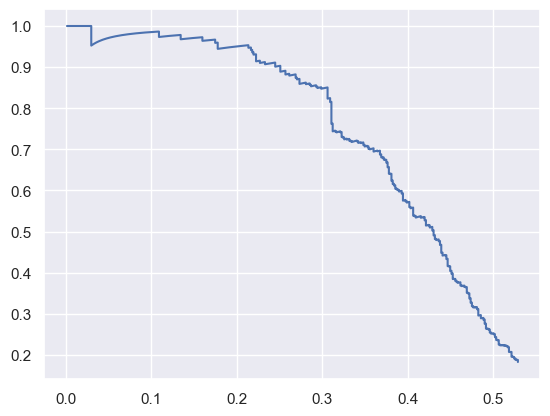

In [42]:
plt.figure()
teddy = bbb.stat.pr(patch_simen, annotations, 0.5)
ap = bbb.stat.ap(teddy)
# teddy.plot('recall', 'precision', drawstyle='steps', label=f'Teddy: mAP: {round(ap*100, 2)}%')
plt.plot(teddy.iloc[:, 1:2], teddy.iloc[:, 0:1], label=f'CLEAN: AP: {round(ap*100, 2)}%')

ap,teddy

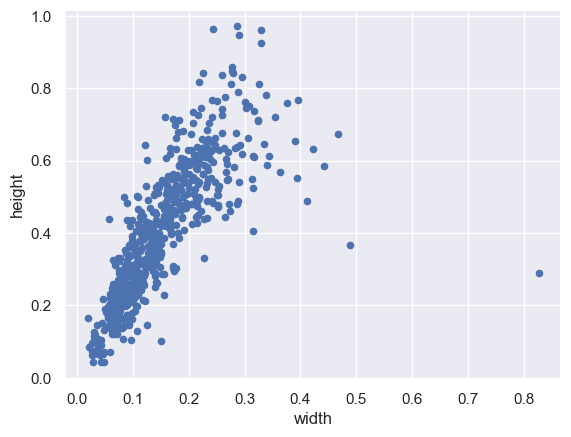

In [43]:
annotations.plot('width', 'height', kind='scatter')
plt.show()

In [44]:
teddy.iloc[:, 0:1],teddy.iloc[:, 1:2],teddy.iloc[:, 2:3]

(      precision
 0      1.000000
 1      1.000000
 2      1.000000
 3      1.000000
 4      1.000000
 ...         ...
 1931   0.183230
 1932   0.183135
 1933   0.183040
 1934   0.182946
 1935   0.182851
 
 [1936 rows x 1 columns],
         recall
 0     0.001495
 1     0.002990
 2     0.004484
 3     0.005979
 4     0.007474
 ...        ...
 1931  0.529148
 1932  0.529148
 1933  0.529148
 1934  0.529148
 1935  0.529148
 
 [1936 rows x 1 columns],
       confidence
 0       0.911032
 1       0.871677
 2       0.843119
 3       0.831195
 4       0.823005
 ...          ...
 1931    0.010124
 1932    0.010109
 1933    0.010106
 1934    0.010039
 1935    0.010025
 
 [1936 rows x 1 columns])

Annotation and detection dataframes do not have the same image categories
Annotation and detection dataframes do not have the same image categories
Annotation and detection dataframes do not have the same image categories
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


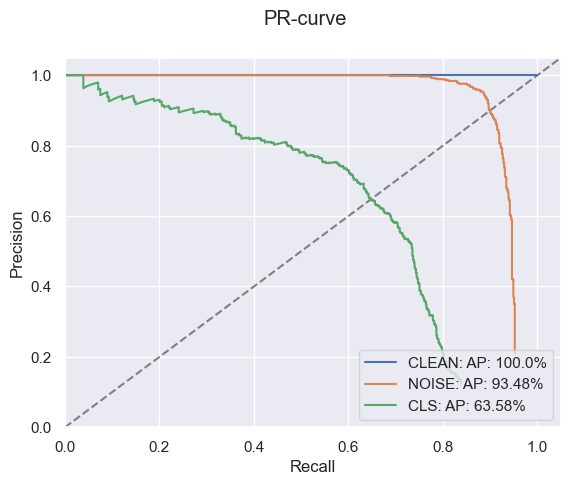

In [45]:
plt.figure()
teddy = bbb.stat.pr(patch_simen, annotations)
up = bbb.stat.pr(patch_up, annotations)
noise = bbb.stat.pr(noise_results, annotations)
clean = bbb.stat.pr(clean_results, annotations)
class_shift = bbb.stat.pr(class_results, annotations)
class_only_pr = bbb.stat.pr(class_only, annotations)



plt.plot([0, 1.05], [0, 1.05], '--', color='gray')

ap = bbb.stat.ap(clean)
plt.plot(clean.iloc[:, 1:2], clean.iloc[:, 0:1], label=f'CLEAN: AP: {round(ap*100, 2)}%')

ap = bbb.stat.ap(noise)
plt.plot(noise.iloc[:, 1:2], noise.iloc[:, 0:1], label=f'NOISE: AP: {round(ap*100, 2)}%')

# ap = bbb.stat.ap(class_shift)
# plt.plot(class_shift.iloc[:, 1:2], class_shift.iloc[:, 0:1], label=f'OBJ-CLS: AP: {round(ap*100, 2)}%')
#
# ap = bbb.stat.ap(up)
# plt.plot(up.iloc[:, 1:2], up.iloc[:, 0:1], label=f'OBJ: AP: {round(ap*100, 2)}%')

ap = bbb.stat.ap(class_only_pr)
plt.plot(class_only_pr.iloc[:, 1:2], class_only_pr.iloc[:, 0:1], label=f'CLS: AP: {round(ap*100, 2)}%')

plt.gcf().suptitle('PR-curve')
plt.gca().set_ylabel('Precision')
plt.gca().set_xlabel('Recall')
plt.gca().set_xlim([0, 1.05])
plt.gca().set_ylim([0, 1.05])
plt.gca().legend(loc=4)
plt.savefig('pr-curve.eps')
plt.show()

In [46]:
for name in patch_simen:
    print(name)

image
class_label
id
x_top_left
y_top_left
width
height
confidence


In [47]:
# def thresh_dets(dets, thresh):
#     thresholded = {}
#     for name in dets:
#         thresholded[name] = [d for d in dets[name] if d['confidence'] > 0.4]
#
#     return thresholded
# # import pandas as pd


In [48]:
def thresh_dets(df, thresh):
    # 获取 "confidence" 列中的布尔值 Series
    mask = df['confidence'] > thresh

    # 使用布尔值 Series 过滤 DataFrame
    filtered_df = df[mask]

    return filtered_df

Annotation and detection dataframes do not have the same image categories
Annotation and detection dataframes do not have the same image categories
Annotation and detection dataframes do not have the same image categories


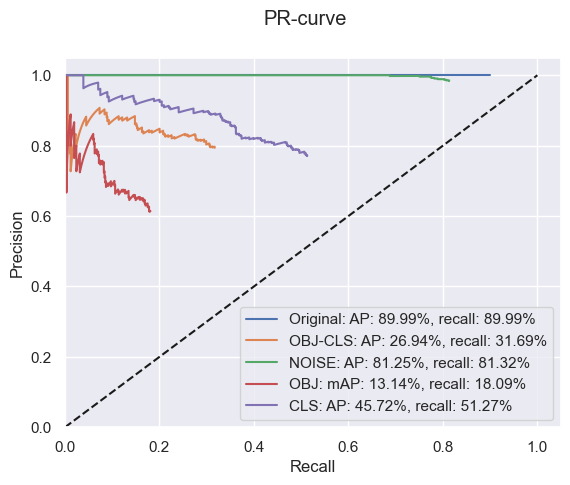

In [49]:
thresh = 0.5
teddy_t = bbb.stat.pr(thresh_dets(patch_simen, thresh), annotations)
up_t = bbb.stat.pr(thresh_dets(patch_up, thresh), annotations)
noise_t = bbb.stat.pr(thresh_dets(noise_results, thresh), annotations)
clean_t = bbb.stat.pr(thresh_dets(clean_results, thresh), annotations)
class_shift_t = bbb.stat.pr(thresh_dets(class_results, thresh), annotations)
class_only_t = bbb.stat.pr(thresh_dets(class_only, thresh), annotations)

plt.figure()

plt.plot([0, 1], [0, 1], 'k--')

ap = bbb.stat.ap(clean_t)
plt.plot(clean_t.iloc[:, 1:2], clean_t.iloc[:, 0:1], label=f'Original: AP: {round(ap*100, 2)}%, recall: {round(clean_t.iloc[-1, 1]*100, 2)}%')

ap = bbb.stat.ap(class_shift_t)
plt.plot(class_shift_t.iloc[:, 1:2], class_shift_t.iloc[:, 0:1], label=f'OBJ-CLS: AP: {round(ap*100, 2)}%, recall: {round(class_shift_t.iloc[-1, 1]*100, 2)}%')

ap = bbb.stat.ap(noise_t)
plt.plot(noise_t.iloc[:, 1:2], noise_t.iloc[:, 0:1], label=f'NOISE: AP: {round(ap*100, 2)}%, recall: {round(noise_t.iloc[-1, 1]*100, 2)}%')

ap = bbb.stat.ap(up_t)
plt.plot(up_t.iloc[:, 1:2], up_t.iloc[:, 0:1], label=f'OBJ: mAP: {round(ap*100, 2)}%, recall: {round(up_t.iloc[-1, 1]*100, 2)}%')

ap = bbb.stat.ap(class_only_t)
plt.plot(class_only_t.iloc[:, 1:2], class_only_t.iloc[:, 0:1], label=f'CLS: AP: {round(ap*100, 2)}%, recall: {round(class_only_t.iloc[-1, 1]*100, 2)}%')

plt.gcf().suptitle('PR-curve')
plt.gca().set_ylabel('Precision')
plt.gca().set_xlabel('Recall')
plt.gca().set_xlim([0, 1.05])
plt.gca().set_ylim([0, 1.05])
plt.gca().legend(loc=4)
plt.show()